In [1]:
%run 1_Data_Cleaning.ipynb

## Key Insights 

### 1. Top 10 Item Categories

In [2]:
category_trend_2016 = clean_df[clean_df["PurchasedYear"] == 2016]
category_trend_2016 = pd.DataFrame(category_trend_2016[["product_category_name_english", "PurchasedYear"]])
category_trend_2017 = clean_df[clean_df["PurchasedYear"] == 2017]
category_trend_2017 = pd.DataFrame(category_trend_2017[["product_category_name_english", "PurchasedYear"]])
category_trend_2018 = clean_df[clean_df["PurchasedYear"] == 2018]
category_trend_2018 = pd.DataFrame(category_trend_2018[["product_category_name_english", "PurchasedYear"]])

In [3]:
category_trend_2016 = category_trend_2016.groupby('product_category_name_english', as_index = False).count()
category_trend_2016 = category_trend_2016.sort_values(by = ['PurchasedYear'], ascending = False).head(10)
category_trend_2016

,product_category_name_english,PurchasedYear
18,furniture_decor,74
20,health_beauty,51
25,perfumery,33
29,toys,27
7,computers_accessories,21
27,sports_leisure,19
3,baby,14
23,market_place,13
2,auto,12
21,housewares,12


C:\Users\Kanek\AppData\Local\Temp\ipykernel_12548\3689986287.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category, rotation = 45,  ha='right')


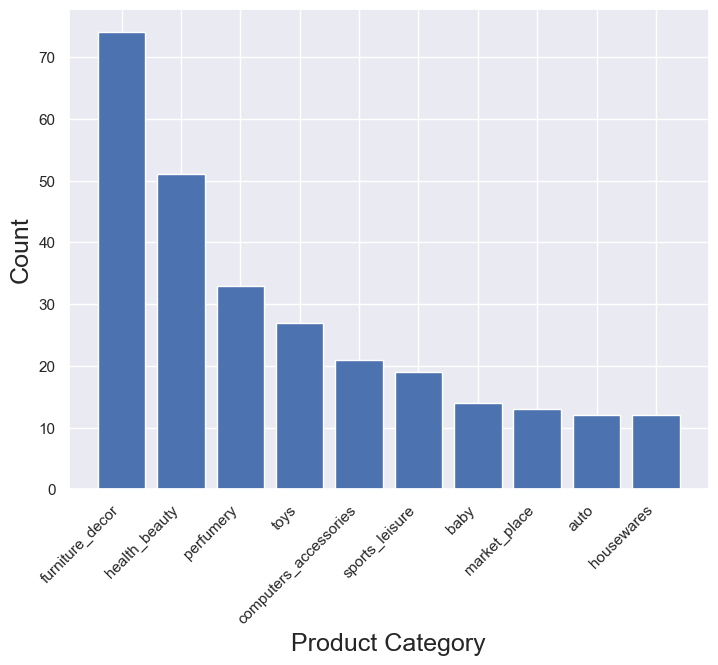

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
category = ['furniture_decor','health_beauty','perfumery','toys','computers_accessories', 'sports_leisure', 'baby', 'market_place', 'auto', 'housewares']
count = [74,51,33,27,21,19,14,13,12,12]
ax.bar(category,count)
ax.set_xticklabels(category, rotation = 45,  ha='right')
plt.xlabel('Product Category', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

In [5]:
category_trend_2017 = category_trend_2017.groupby('product_category_name_english', as_index = False).count()
category_trend_2017 = category_trend_2017.sort_values(by = ['PurchasedYear'], ascending = False).head(10)
category_trend_2017

,product_category_name_english,PurchasedYear
7,bed_bath_table,5343
39,furniture_decor,4201
65,sports_leisure,4140
43,health_beauty,3709
15,computers_accessories,3116
49,housewares,2919
69,toys,2607
42,garden_tools,2470
20,cool_stuff,2322
70,watches_gifts,2288


C:\Users\Kanek\AppData\Local\Temp\ipykernel_12548\4010811529.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category, rotation = 45,  ha='right')


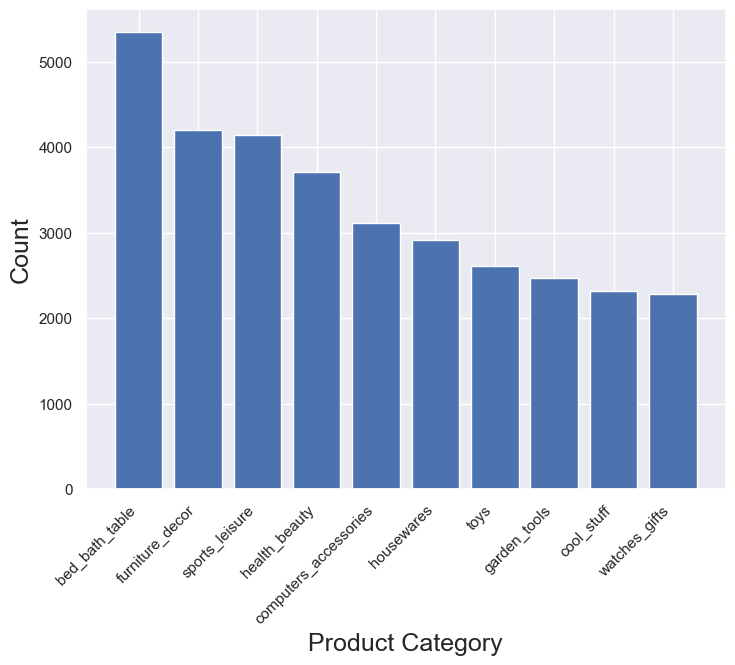

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
category = ['bed_bath_table','furniture_decor','sports_leisure','health_beauty','computers_accessories', 'housewares', 'toys', 'garden_tools', 'cool_stuff', 'watches_gifts']
count = [5343,4201,4140,3709,3116,2919,2607,2470,2322,2288]
ax.bar(category,count)
ax.set_xticklabels(category, rotation = 45,  ha='right')
plt.xlabel('Product Category', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

In [7]:
category_trend_2018 = category_trend_2018.groupby('product_category_name_english', as_index = False).count()
category_trend_2018 = category_trend_2018.sort_values(by = ['PurchasedYear'], ascending = False).head(10)
category_trend_2018

,product_category_name_english,PurchasedYear
43,health_beauty,5968
7,bed_bath_table,5921
15,computers_accessories,4758
64,sports_leisure,4542
39,furniture_decor,4141
49,housewares,4058
69,watches_gifts,3708
5,auto,2629
67,telephony,2338
42,garden_tools,1886


C:\Users\Kanek\AppData\Local\Temp\ipykernel_12548\2414978910.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category, rotation = 45,  ha='right')


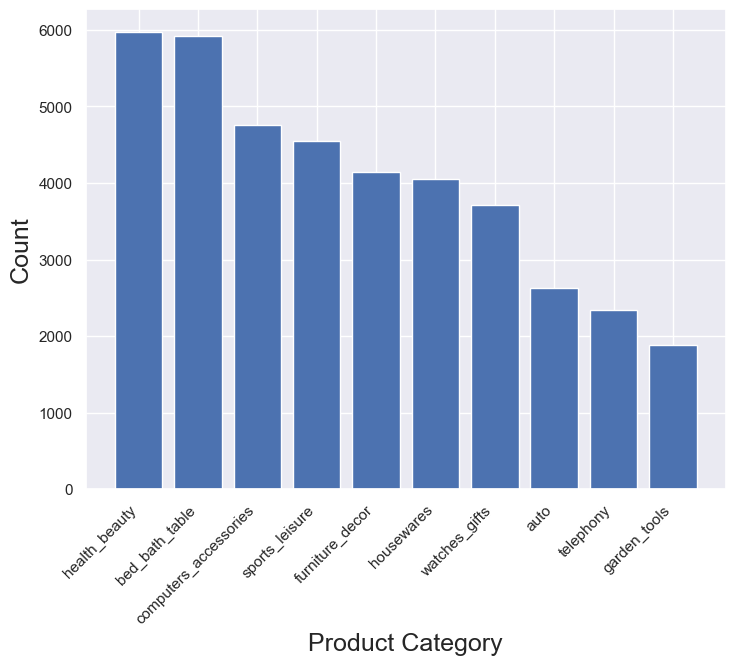

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
category = ['health_beauty','bed_bath_table','computers_accessories','sports_leisure','furniture_decor', 'housewares', 'watches_gifts', 'auto', 'telephony', 'garden_tools']
count = [5968,5921,4758,4542,4141,4058,3708,2629,2338,1886]
ax.bar(category,count)
ax.set_xticklabels(category, rotation = 45,  ha='right')
plt.xlabel('Product Category', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

### 2. Delivery Timing to hit for good review score 

In [9]:
clean_df

,order_id,product_id,customer_id,customer_unique_id,product_category_name_english,product_description_length,product_photos_qty,actual_hours,delivery_days,estimated,time_diff,price,freight_value,payment_type,payment_value,payment_installments,PurchasedYear,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,cool_stuff,598.0,4.0,182.0,7.0,375.0,193.0,58.90,13.29,credit_card,72.19,2.0,2017,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,pet_shop,239.0,2.0,389.0,16.0,445.0,56.0,239.90,19.93,credit_card,259.83,3.0,2017,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,furniture_decor,695.0,2.0,190.0,7.0,513.0,323.0,199.00,17.87,credit_card,216.87,5.0,2018,5
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,perfumery,480.0,1.0,147.0,6.0,278.0,131.0,12.99,12.79,credit_card,25.78,2.0,2018,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,garden_tools,409.0,1.0,602.0,25.0,970.0,368.0,199.90,18.14,credit_card,218.04,3.0,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113317,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,housewares,1002.0,3.0,416.0,17.0,586.0,170.0,299.99,43.41,boleto,343.40,1.0,2018,5
113318,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,computers_accessories,232.0,1.0,226.0,9.0,421.0,195.0,350.00,36.53,boleto,386.53,1.0,2018,5
113319,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,sports_leisure,869.0,1.0,115.0,4.0,414.0,299.0,99.90,16.95,credit_card,116.85,3.0,2017,5
113320,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,computers_accessories,1306.0,1.0,46.0,1.0,240.0,194.0,55.99,8.72,credit_card,64.71,3.0,2017,5


<Axes: xlabel='review_score', ylabel='delivery_days'>

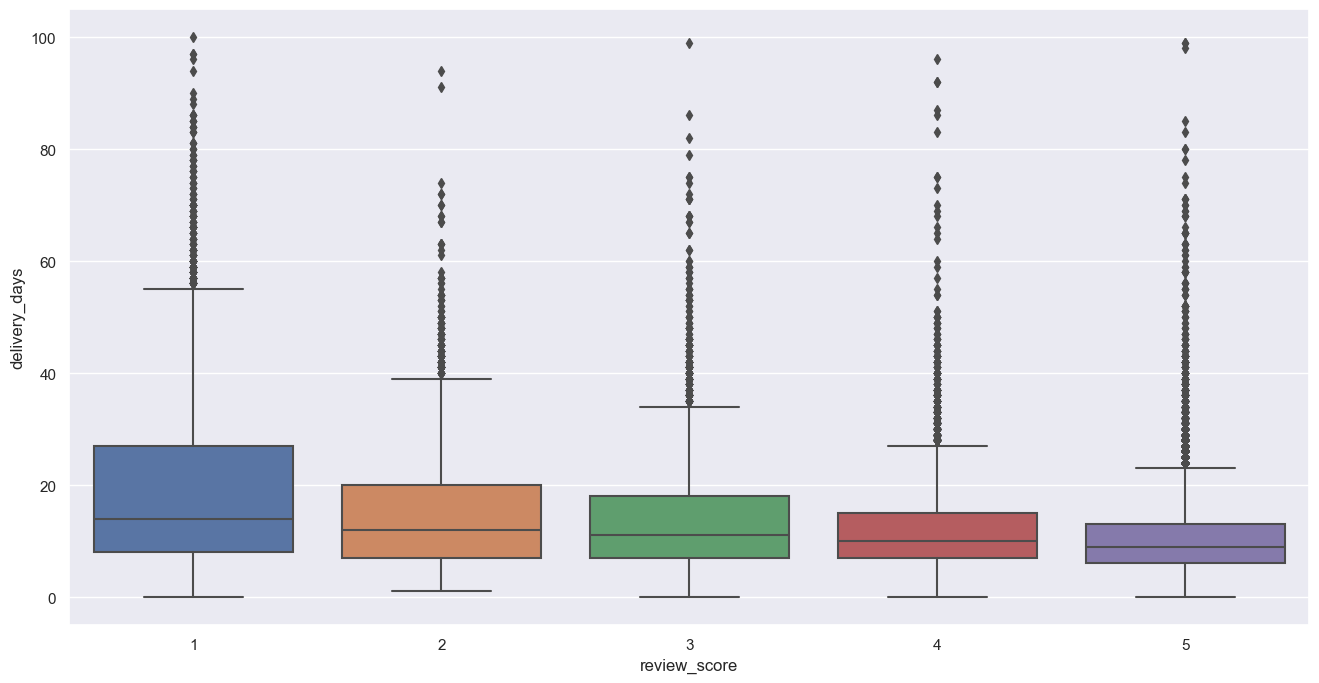

In [10]:
delivery = clean_df[['delivery_days', 'review_score']]
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'delivery_days', data = delivery[delivery.delivery_days <= 100])

### 3. Highest customer activity

In [11]:
timing = order_file[['order_id','order_time']]
timing['date'] = [d.date() for d in timing['order_time']]
timing['time'] = [d.time() for d in timing['order_time']]
timing['hour'] = timing['order_time'].dt.round('H').dt.hour
timing['day_of_week'] = timing['order_time'].dt.day_name()
hours = timing['hour']
days = timing['day_of_week']

C:\Users\Kanek\AppData\Local\Temp\ipykernel_12548\3322346603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timing['date'] = [d.date() for d in timing['order_time']]
C:\Users\Kanek\AppData\Local\Temp\ipykernel_12548\3322346603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timing['time'] = [d.time() for d in timing['order_time']]
C:\Users\Kanek\AppData\Local\Temp\ipykernel_12548\3322346603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Axes: xlabel='hour', ylabel='Count'>

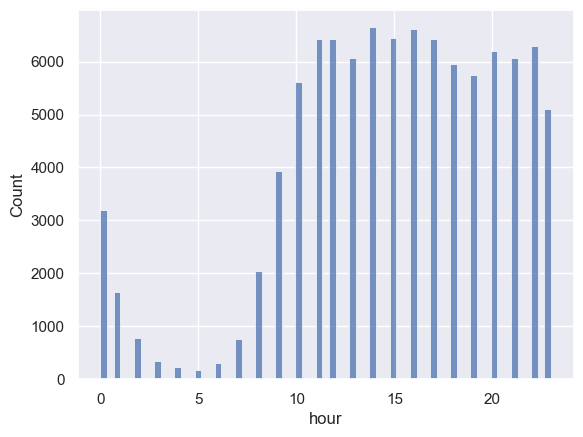

In [12]:
sb.histplot(data = hours)

<Axes: xlabel='day_of_week', ylabel='Count'>

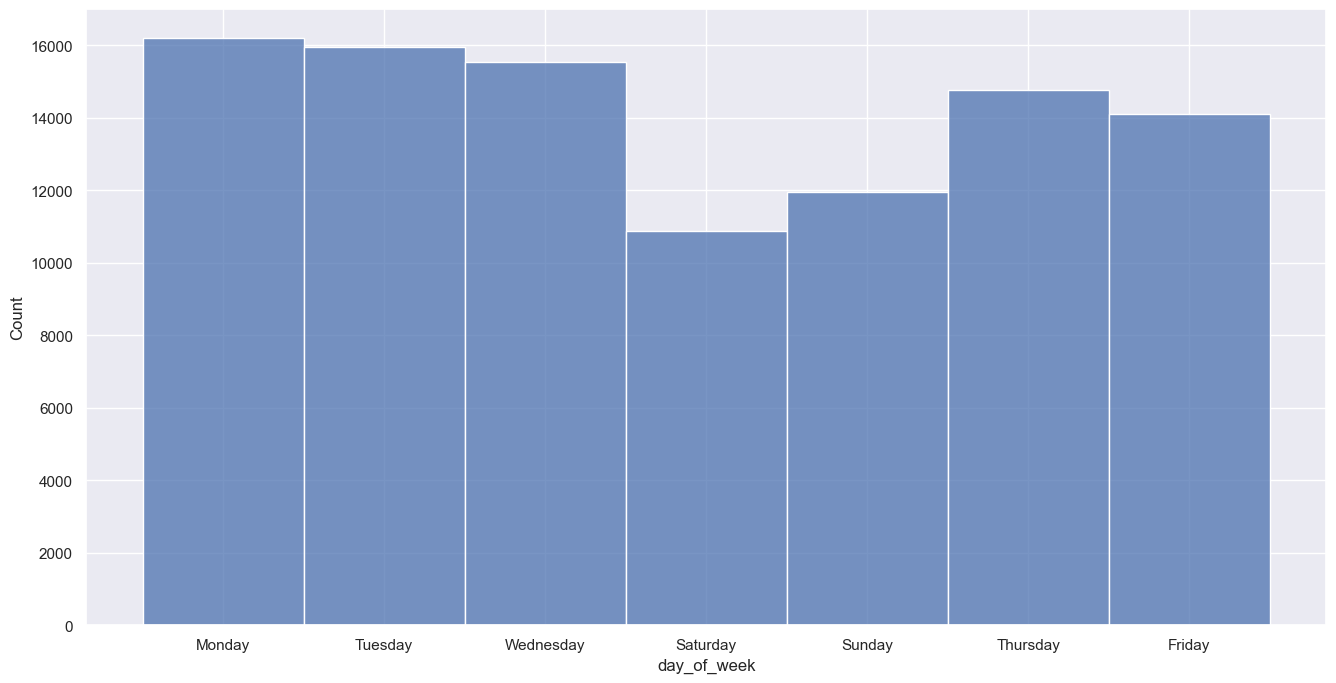

In [13]:
f = plt.figure(figsize=(16, 8))
sb.histplot(days)